In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

import numpyro
import numpyro.infer.kernels as kernels
from numpyro.callbacks import Progbar
from numpyro.distributions import NormalMixture
from numpyro.infer import ELBO
from numpyro.infer.autoguide import AutoDelta
from numpyro.infer.initialization import init_with_noise, init_to_value
from numpyro.infer.stein import SVGD

In [2]:
rng_key = jax.random.PRNGKey(42)
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(jnp.array([1/3, 2/3]), 
                                      jnp.array([-2., 2.]), jnp.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)

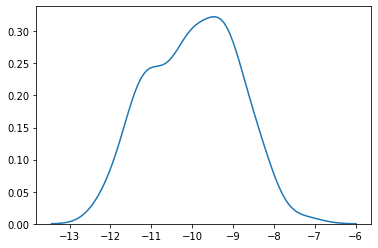

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.train(rng_key, num_iterations, callbacks=[Progbar()])

VI 2.0227: 100%|██████████| 1500/1500 [00:05<00:00, 299.52it/s]


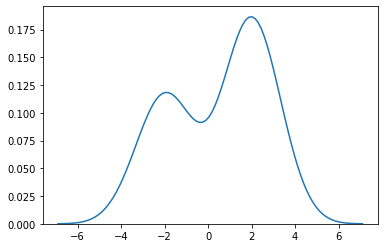

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([ 0.77936053,  0.5075566 ,  1.5531994 , -2.9124336 ,
             -2.5861757 ,  1.0188638 ,  2.7766004 , -3.2916176 ,
              2.0446105 ,  1.7454122 ,  2.6505852 ,  2.0485837 ,
              2.4522896 ,  1.6705111 ,  2.2654183 ,  1.9110806 ,
             -2.1881971 ,  3.7900913 , -1.4718632 ,  3.4394617 ,
              1.2964942 ,  0.7782798 ,  0.29006946,  2.2730966 ,
             -2.031106  ,  0.2996308 ,  1.7588747 ,  1.9683027 ,
              1.6049732 , -1.3390625 ,  0.46156394,  2.56944   ,
              2.0715988 ,  1.4196674 , -2.0331926 , -3.70292   ,
              2.7364373 , -1.584768  ,  2.1252942 , -0.64030564,
             -1.4856905 ,  1.0763823 , -1.74529   ,  3.861932  ,
              3.1126878 , -2.6214178 ,  2.778396  ,  2.4946613 ,
              2.436725  , -0.6238414 , -0.37435982,  2.4239705 ,
             -2.3527236 ,  3.1623242 , -0.61154646, -2.6652892 ,
              1.8522075 , -0.6126753 ,  3.5802388 , -2.0598075 ,
              2.9278228 ,

In [9]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.LinearKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

AttributeError: 'SVGD' object has no attribute 'run'

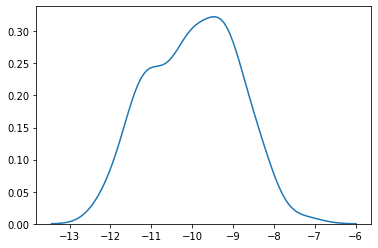

In [10]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [11]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RandomFeatureKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations * 2)

AttributeError: 'SVGD' object has no attribute 'run'

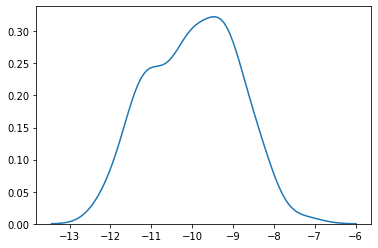

In [12]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [13]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.IMQKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

AttributeError: 'SVGD' object has no attribute 'run'

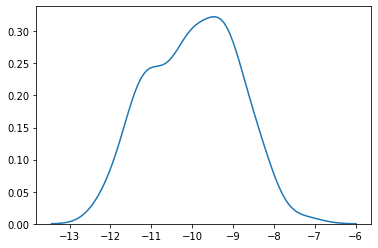

In [14]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [15]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.MixtureKernel([0.5, 0.5], [kernels.LinearKernel(), kernels.RandomFeatureKernel()]),
            num_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

AttributeError: 'SVGD' object has no attribute 'run'

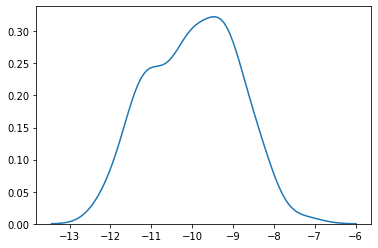

In [16]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])